# 공공API (1) -관광정보
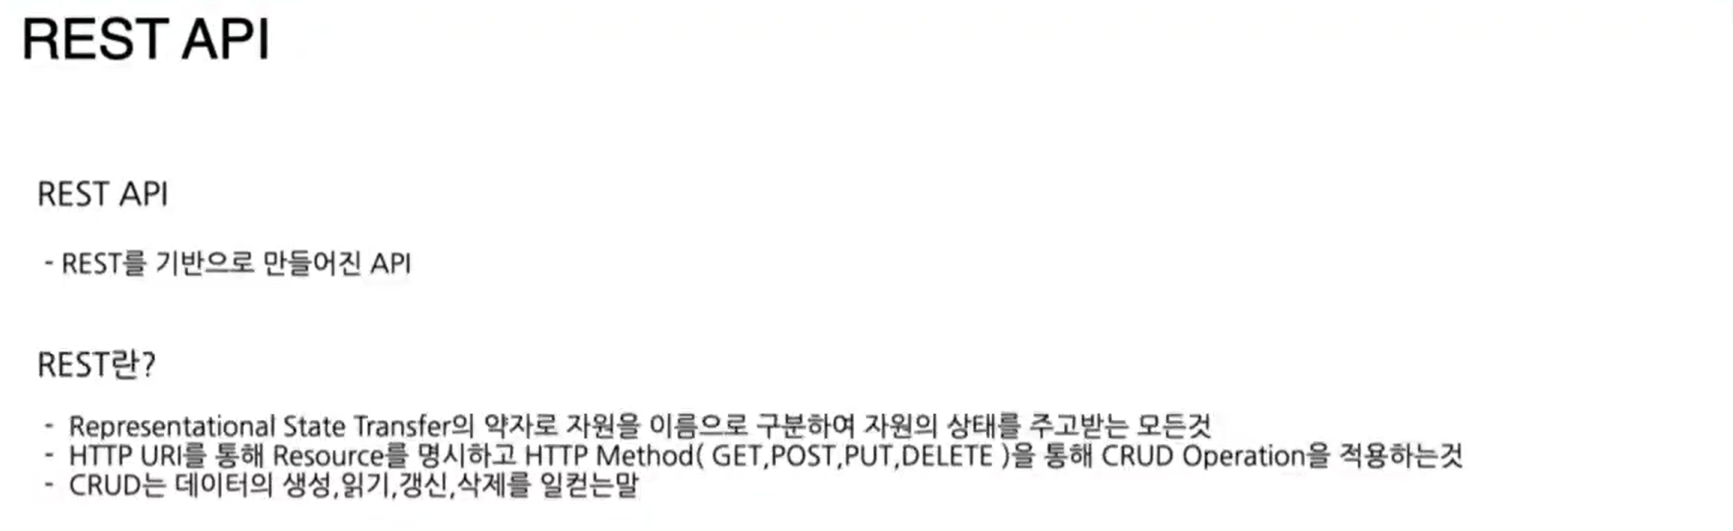

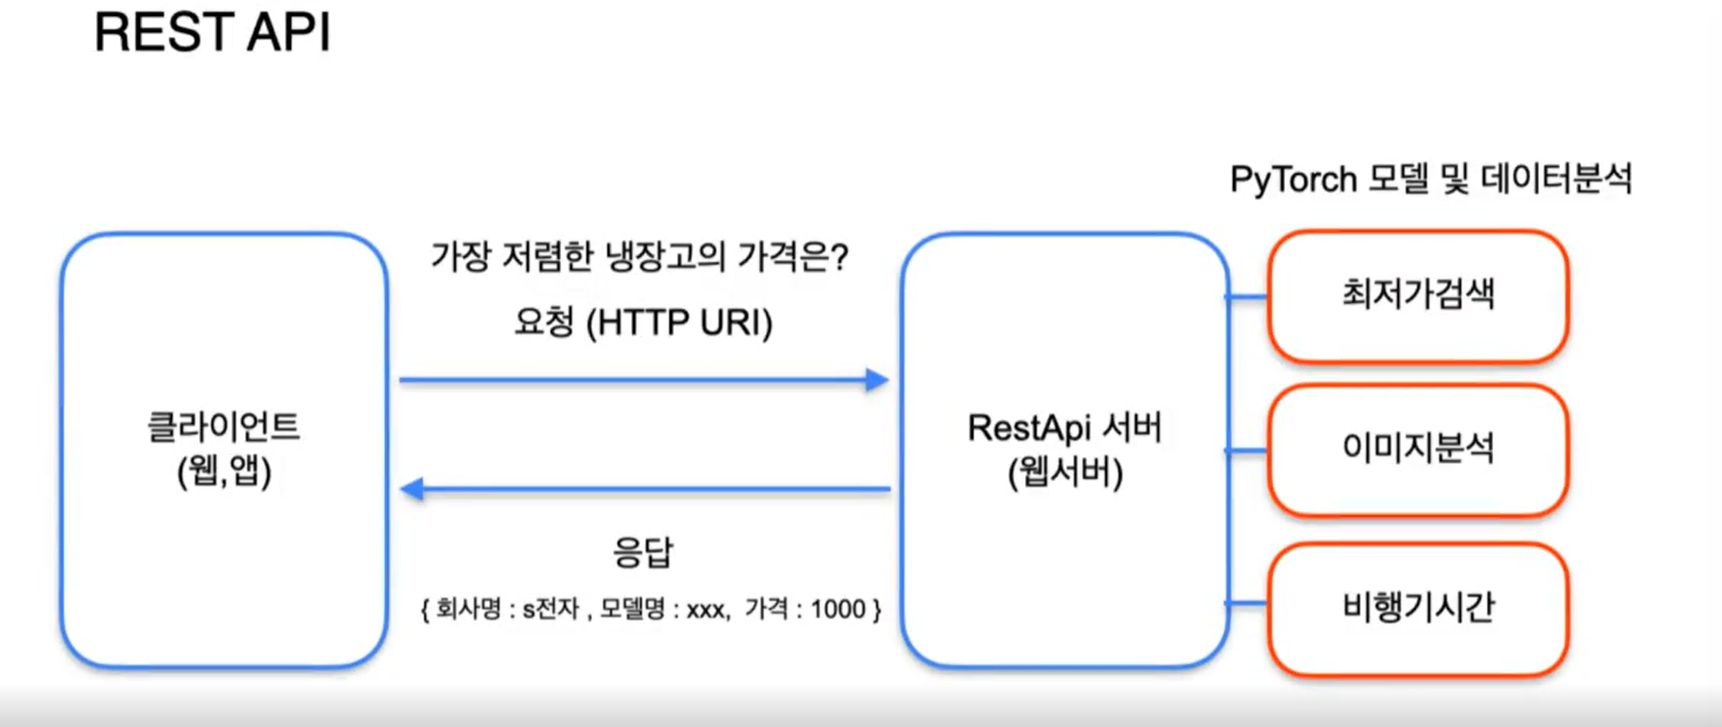
## 1. 오픈API 정의
 - 오픈: Open, 개방, 공개  
 - API: Application Programming Interface, 응용 프로그램 인터페이스  
 - 오픈 API: 일반적으로 웹 서비스(Web Services)형태로써  특정 기능 혹은 콘텐츠 서비스를 위해 외부에 접근 방법을 공개한 형태  

## 2. 오픈 API 동작 원리(1)
### - 이용자 입장에서 동작 단계
#### >요청(request)하는 단계
- GET방식
- POST방식
    
#### > 결과 (response)값을 받아 해석(parse)하는 단계

## 3. 오픈API 동작원리(2)
- [참고] HTTP 프로토콜을 이용해 클라이언트에서 서버에데이터를 전달하는 방법 

### > GET 방식
 - 링크(link) 할 수 있는 URL을 가지고 있는 것 
 #### [형식] 요청URL?변수1=변수값1&변수2=변수값2...  (‘&’표기로 변수구분) 
 
### > POST 방식
 - 폼(form)을 이용해서 수행(submit)하는 형태 
 - 수행 내용이 (body 안에) 숨겨져서 보내짐 
 - 서버의 값이나 상태를 바꾸기 위해 사용 

In [1]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'#한글 깨짐 해결
plt.rcParams['axes.unicode_minus'] = False  #- 깨짐 해결

In [2]:
KEY='Jid5jJfVfwuc7brfbSDE6yxusvhmIOTMmmZE%2F%2F%2B2YdeSPIAoRpSnof9qpb5OSeEpyvP8xnb6AO4V7kXVEJFPEQ%3D%3D'
startDate='20210101'
endDate='20211231'

url1='http://api.visitkorea.or.kr/openapi/service/rest/KorService/searchFestival?serviceKey=' +KEY
url2='&numOfRows=1000&pageNo=1&MobileOS=ETC&MobileApp=AppTest&arrange=A&listYN=Y&eventStartDate='+startDate
url3='&eventStartDate='+endDate
url=url1+url2+url3
print(url)

http://api.visitkorea.or.kr/openapi/service/rest/KorService/searchFestival?serviceKey=Jid5jJfVfwuc7brfbSDE6yxusvhmIOTMmmZE%2F%2F%2B2YdeSPIAoRpSnof9qpb5OSeEpyvP8xnb6AO4V7kXVEJFPEQ%3D%3D&numOfRows=1000&pageNo=1&MobileOS=ETC&MobileApp=AppTest&arrange=A&listYN=Y&eventStartDate=20210101&eventStartDate=20211231


In [3]:
xml=requests.get(url)
soup=bs(xml.text,'html.parser')

C:\Users\hmh\.conda\envs\hmh\lib\site-packages\bs4\builder\__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


In [4]:
soup

<?xml version="1.0" encoding="UTF-8" standalone="yes"?><response><header><resultcode>0000</resultcode><resultmsg>OK</resultmsg></header><body><items><item><addr1>서울특별시 종로구 삼청로 30</addr1><addr2>(소격동)</addr2><areacode>1</areacode><cat1>A02</cat1><cat2>A0208</cat2><cat3>A02080500</cat3><contentid>2733528</contentid><contenttypeid>15</contenttypeid><createdtime>20210813014105</createdtime><eventenddate>20220606</eventenddate><eventstartdate>20210721</eventstartdate><firstimage>http://tong.visitkorea.or.kr/cms/resource/27/2733527_image2_1.jpg</firstimage><firstimage2>http://tong.visitkorea.or.kr/cms/resource/27/2733527_image2_1.jpg</firstimage2><mapx>126.9800649747</mapx><mapy>37.5788361778</mapy><mlevel>6</mlevel><modifiedtime>20220603161322</modifiedtime><readcount>0</readcount><sigungucode>23</sigungucode><tel>02-3701-9500</tel><title>《MMCA 이건희컬렉션 특별전: 한국미술명작》</title></item><item><addr1>경상북도 칠곡군 가산면 학하들안2길 105</addr1><areacode>35</areacode><cat1>A02</cat1><cat2>A0207</cat2><cat3>A0207020

In [5]:
data=soup.find_all('item')
len(data)

971

In [6]:
data=soup.find_all('item')

items=['title','addr1','eventstartdate','eventenddate','areacode','cat1','cat2','cat3','mapx','mapy','tel']

res=[]
for i in data:
    ls={}
    for j in items:
        try:
            ls[j]=i.find(j).text
        except:
            ls[j]=None
    res.append(ls)

        


In [7]:
df=pd.DataFrame(res)
df

,title,addr1,eventstartdate,eventenddate,areacode,cat1,cat2,cat3,mapx,mapy,tel
0,《MMCA 이건희컬렉션 특별전: 한국미술명작》,서울특별시 종로구 삼청로 30,20210721,20220606,1,A02,A0208,A02080500,126.9800649747,37.5788361778,02-3701-9500
1,가산수피아 '봄의 정원',경상북도 칠곡군 가산면 학하들안2길 105,20210320,20210630,35,A02,A0207,A02070200,128.4850691574,36.0861545517,054-971-9861
2,가족끼리 빙어체험 2021,경기도 양평군 단월면 곱다니길 55-2 수미마을 방문객센터,20210116,20211231,31,A02,A0208,A02081300,127.6574135888,37.5145504080,031-775-5205
3,가평씽씽송어축제 2021,경기도 가평군 가평읍 가평제방길 119,20220101,20220220,31,A02,A0207,A02070200,127.5174061076,37.8258616779,031-581-6423
4,감악산 꽃&별 여행,거창군 신원면 덕산리 산 57,20210924,20211017,36,A02,A0207,A02070200,127.9163995903,35.5912836573,055-940-3390
...,...,...,...,...,...,...,...,...,...,...,...
966,[문화관광축제] 횡성한우축제,온라인개최,20211001,20211015,32,A02,A0207,A02070100,127.9871481157,37.4981056564,1522-1099
967,[문화관광축제] 2021 온라인 진안홍삼축제,온라인개최,20211008,20211010,None,A02,A0207,A02070100,127.4162695779,35.7732125289,063-430-2391~3
968,[제주] 제주민속촌 설몽아일랜드,제주특별자치도 서귀포시 표선면 민속해안로 631-34,20211211,20220213,39,A02,A0207,A02070200,126.8430383774,33.3213690665,02-1522-2089
969,[제주] 휴애리 동백축제,제주특별자치도 서귀포시 남원읍 신례동로 256,20211112,20220131,39,A02,A0207,A02070200,126.6344317363,33.3085171454,064-732-2114


In [8]:
df.shape

(971, 11)

In [9]:
df.isnull().sum()

title              0
addr1             20
eventstartdate     0
eventenddate       0
areacode          72
cat1               1
cat2               1
cat3               1
mapx              65
mapy              65
tel               14
dtype: int64

In [10]:
df[df.isnull().any(axis=1)]

,title,addr1,eventstartdate,eventenddate,areacode,cat1,cat2,cat3,mapx,mapy,tel
6,강동북페스티벌,온라인 개최,20211012,20211016,None,A02,A0207,A02070200,127.1573829418,37.5512675743,"강일 427-4004, 성내 471-0044, 해공 478-9656, 암사 429-..."
8,강동청년축제,None,20211030,20211106,None,A02,A0207,A02070200,None,None,02-482-7647
13,강진청자축제,온라인 개최,20211001,20211007,None,A02,A0207,A02070200,126.8011114048,34.5075226164,061-430-3352
71,국제무형유산영상축제(IIFF),온라인개최,20210910,20210912,None,A02,A0207,A02070200,None,None,None
105,남원흥부제,전라북도 남원시 양림길 43,20211014,20211017,37,A02,A0207,A02070200,127.3901093704,35.4022568890,None
...,...,...,...,...,...,...,...,...,...,...,...
906,2022 휴[休]콘서트,강원도 평창군 방림면 계촌리,20220528,20220528,32,A02,A0207,A02070200,128.3011239249,37.4518530176,None
934,"NextRise 2021, Seoul",서울특별시 강남구 영동대로 513,20220616,20220617,1,A02,A0208,A02080600,127.0594429796,37.5117148467,None
964,[문화관광축제] 포항국제불빛축제,온라인개최,20211120,20211121,None,A02,A0207,A02070100,129.3781024219,36.0573218107,054-289-7852
967,[문화관광축제] 2021 온라인 진안홍삼축제,온라인개최,20211008,20211010,None,A02,A0207,A02070100,127.4162695779,35.7732125289,063-430-2391~3


In [11]:
#mapx가 null값인 것 삭제하고 나머지 null은 빈칸으로 채움
df1=df[df['mapx'].notnull()]

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 906 entries, 0 to 969
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           906 non-null    object
 1   addr1           904 non-null    object
 2   eventstartdate  906 non-null    object
 3   eventenddate    906 non-null    object
 4   areacode        884 non-null    object
 5   cat1            905 non-null    object
 6   cat2            905 non-null    object
 7   cat3            905 non-null    object
 8   mapx            906 non-null    object
 9   mapy            906 non-null    object
 10  tel             893 non-null    object
dtypes: object(11)
memory usage: 84.9+ KB


In [13]:
df1=df1.fillna('')

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 906 entries, 0 to 969
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           906 non-null    object
 1   addr1           906 non-null    object
 2   eventstartdate  906 non-null    object
 3   eventenddate    906 non-null    object
 4   areacode        906 non-null    object
 5   cat1            906 non-null    object
 6   cat2            906 non-null    object
 7   cat3            906 non-null    object
 8   mapx            906 non-null    object
 9   mapy            906 non-null    object
 10  tel             906 non-null    object
dtypes: object(11)
memory usage: 84.9+ KB


In [15]:
df1.head()

,title,addr1,eventstartdate,eventenddate,areacode,cat1,cat2,cat3,mapx,mapy,tel
0,《MMCA 이건희컬렉션 특별전: 한국미술명작》,서울특별시 종로구 삼청로 30,20210721,20220606,1,A02,A0208,A02080500,126.9800649747,37.5788361778,02-3701-9500
1,가산수피아 '봄의 정원',경상북도 칠곡군 가산면 학하들안2길 105,20210320,20210630,35,A02,A0207,A02070200,128.4850691574,36.0861545517,054-971-9861
2,가족끼리 빙어체험 2021,경기도 양평군 단월면 곱다니길 55-2 수미마을 방문객센터,20210116,20211231,31,A02,A0208,A02081300,127.6574135888,37.5145504080,031-775-5205
3,가평씽씽송어축제 2021,경기도 가평군 가평읍 가평제방길 119,20220101,20220220,31,A02,A0207,A02070200,127.5174061076,37.8258616779,031-581-6423
4,감악산 꽃&별 여행,거창군 신원면 덕산리 산 57,20210924,20211017,36,A02,A0207,A02070200,127.9163995903,35.5912836573,055-940-3390


In [16]:
# 지역 검색
df1[df1['addr1'].str.contains('온라인')]

,title,addr1,eventstartdate,eventenddate,areacode,cat1,cat2,cat3,mapx,mapy,tel
6,강동북페스티벌,온라인 개최,20211012,20211016,,A02,A0207,A02070200,127.1573829418,37.5512675743,"강일 427-4004, 성내 471-0044, 해공 478-9656, 암사 429-..."
13,강진청자축제,온라인 개최,20211001,20211007,,A02,A0207,A02070200,126.8011114048,34.5075226164,061-430-3352
33,계촌 클래식 축제,온라인 개최,20210821,20210822,32,A02,A0207,A02070200,128.3039208605,37.4530112700,02-966-6563
62,괴산고추축제,온라인개최,20210826,20210915,33,A02,A0207,A02070200,127.7866969589,36.8153806672,괴산군청 043-830-3461~3
74,국제종자박람회,온라인개최,20211006,20211102,37,A02,A0207,A02070200,126.9058794948,35.8558248270,063-219-8831~5
...,...,...,...,...,...,...,...,...,...,...,...
945,[문화관광축제]온라인 봉화은어축제,온라인개최,20210724,20210815,35,A02,A0207,A02070100,128.7378736170,36.8903231162,054-674-3053
950,[문화관광축제] 산청한방약초축제,온라인개최,20220930,20221010,36,A02,A0207,A02070100,127.8718053038,35.4196966993,055-970-6601~5
964,[문화관광축제] 포항국제불빛축제,온라인개최,20211120,20211121,,A02,A0207,A02070100,129.3781024219,36.0573218107,054-289-7852
966,[문화관광축제] 횡성한우축제,온라인개최,20211001,20211015,32,A02,A0207,A02070100,127.9871481157,37.4981056564,1522-1099


In [17]:
#온라인 축제 많이 하는 지역 검색
df1[df1['addr1'].str.contains('온라인')]['areacode'].value_counts()


      20
1     16
35     4
32     3
37     3
6      3
33     2
2      2
36     2
34     2
31     2
39     2
5      1
3      1
38     1
Name: areacode, dtype: int64

In [18]:
df1[df1['addr1'].str.contains('서울')]

,title,addr1,eventstartdate,eventenddate,areacode,cat1,cat2,cat3,mapx,mapy,tel
0,《MMCA 이건희컬렉션 특별전: 한국미술명작》,서울특별시 종로구 삼청로 30,20210721,20220606,1,A02,A0208,A02080500,126.9800649747,37.5788361778,02-3701-9500
5,강남인테리어디자인위크,서울특별시 강남구 논현동,20220826,20220904,1,A02,A0208,A02080600,127.0225157989,37.5112531257,02-3423-5532
7,강동선사문화축제,서울특별시 강동구 성내로 25,20211008,20211010,1,A02,A0207,A02070200,127.1237865998,37.5301777510,02-3425-8530
16,거리예술 캬라반 ‘봄’,서울특별시 중구 을지로 281,20220423,20220522,1,A02,A0207,A02070200,127.0095709797,37.5661076320,02-3437-0059
18,겸재문화예술제,서울특별시 강서구 양천로47길 36,20220611,20220611,1,A02,A0207,A02070200,126.8383836374,37.5722066362,02-2659-2206
...,...,...,...,...,...,...,...,...,...,...,...
931,MODAFE 2022 (제41회 국제현대무용제),서울특별시 종로구 대학로8길 7 한국문예회관,20220513,20220618,1,A02,A0207,A02070200,127.0029878163,37.5812640855,02-763-5351
932,N서울타워 ‘봄N페스티벌’,서울특별시 용산구 남산공원길 105 YTN서울타워,20220501,20220531,1,A02,A0207,A02070200,126.9878733796,37.5511700886,02-3455-9277
933,N서울타워 벚꽃 페스티벌 ‘Blossom TOWER’,서울특별시 용산구 남산공원길 105 YTN서울타워,20220401,20220430,1,A02,A0207,A02070200,126.9878733796,37.5511700886,02-3455-9277
934,"NextRise 2021, Seoul",서울특별시 강남구 영동대로 513,20220616,20220617,1,A02,A0208,A02080600,127.0594429796,37.5117148467,


In [19]:
#서비스 분류코드 읽기
b_code=pd.read_csv('./서비스분류코드.csv',encoding='euc-kr')

In [20]:
b_code

,cat1,cat2,cat3,대분류,중분류,소분류,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,A01,A0101,A01010100,자연,자연관광지,국립공원,NaN,NaN,NaN
1,A01,A0101,A01010200,자연,자연관광지,도립공원,NaN,NaN,NaN
2,A01,A0101,A01010300,자연,자연관광지,군립공원,NaN,NaN,NaN
3,A01,A0101,A01010400,자연,자연관광지,산,NaN,NaN,NaN
4,A01,A0101,A01010500,자연,자연관광지,자연생태관광지,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
202,B01,B0102,B01020100,교통,교통시설,공항,NaN,NaN,NaN
203,B01,B0102,B01020200,교통,교통시설,기차역,NaN,NaN,NaN
204,B01,B0102,B01020300,교통,교통시설,버스터미널,NaN,NaN,NaN
205,B01,B0102,B01020400,교통,교통시설,여객선터미널,NaN,NaN,NaN


In [21]:
b_code=b_code.iloc[:,:-3]

In [22]:
b_code

,cat1,cat2,cat3,대분류,중분류,소분류
0,A01,A0101,A01010100,자연,자연관광지,국립공원
1,A01,A0101,A01010200,자연,자연관광지,도립공원
2,A01,A0101,A01010300,자연,자연관광지,군립공원
3,A01,A0101,A01010400,자연,자연관광지,산
4,A01,A0101,A01010500,자연,자연관광지,자연생태관광지
...,...,...,...,...,...,...
202,B01,B0102,B01020100,교통,교통시설,공항
203,B01,B0102,B01020200,교통,교통시설,기차역
204,B01,B0102,B01020300,교통,교통시설,버스터미널
205,B01,B0102,B01020400,교통,교통시설,여객선터미널


In [23]:
b_code[b_code.isnull().any(axis=1)]

,cat1,cat2,cat3,대분류,중분류,소분류
90,C01,C0101,NaN,추천코스,드라이브코스,NaN
91,C01,C0102,NaN,추천코스,지자체추천코스,NaN
92,C01,C0103,NaN,추천코스,문화재청추천코스,NaN
93,C01,C0104,NaN,추천코스,마니아추천코스,NaN
94,C01,C0105,NaN,추천코스,답사단추천코스,NaN
97,C01,C0106,NaN,추천코스,구석구석추천코스,NaN
98,C01,C0107,NaN,추천코스,보고보고추천코스,NaN
99,C01,C0108,NaN,추천코스,교과서 추천코스,NaN
100,C01,C0109,NaN,추천코스,희망여행추천코스,NaN
101,C01,C0110,NaN,추천코스,리프레시여행 추천코스,NaN


In [24]:
b_code=b_code.dropna()

In [25]:
b_code.isnull().sum()

cat1    0
cat2    0
cat3    0
대분류     0
중분류     0
소분류     0
dtype: int64

In [26]:
b_code.head()

,cat1,cat2,cat3,대분류,중분류,소분류
0,A01,A0101,A01010100,자연,자연관광지,국립공원
1,A01,A0101,A01010200,자연,자연관광지,도립공원
2,A01,A0101,A01010300,자연,자연관광지,군립공원
3,A01,A0101,A01010400,자연,자연관광지,산
4,A01,A0101,A01010500,자연,자연관광지,자연생태관광지


# 데이터 프레임 merage
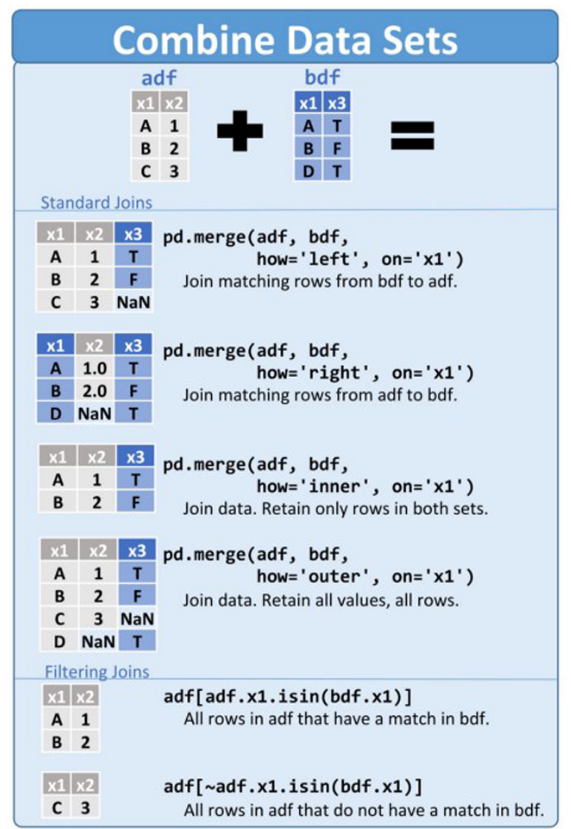

In [27]:
display(df.head(1))
display(b_code.head(1))

,title,addr1,eventstartdate,eventenddate,areacode,cat1,cat2,cat3,mapx,mapy,tel
0,《MMCA 이건희컬렉션 특별전: 한국미술명작》,서울특별시 종로구 삼청로 30,20210721,20220606,1,A02,A0208,A02080500,126.9800649747,37.5788361778,02-3701-9500


,cat1,cat2,cat3,대분류,중분류,소분류
0,A01,A0101,A01010100,자연,자연관광지,국립공원


In [28]:
df_m=pd.merge(df,b_code, how='left')
df_m.head(3)

,title,addr1,eventstartdate,eventenddate,areacode,cat1,cat2,cat3,mapx,mapy,tel,대분류,중분류,소분류
0,《MMCA 이건희컬렉션 특별전: 한국미술명작》,서울특별시 종로구 삼청로 30,20210721,20220606,1,A02,A0208,A02080500,126.9800649747,37.5788361778,02-3701-9500,인문(문화/예술/역사),공연/행사,전시회
1,가산수피아 '봄의 정원',경상북도 칠곡군 가산면 학하들안2길 105,20210320,20210630,35,A02,A0207,A02070200,128.4850691574,36.0861545517,054-971-9861,인문(문화/예술/역사),축제,일반축제
2,가족끼리 빙어체험 2021,경기도 양평군 단월면 곱다니길 55-2 수미마을 방문객센터,20210116,20211231,31,A02,A0208,A02081300,127.6574135888,37.5145504080,031-775-5205,인문(문화/예술/역사),공연/행사,기타행사


In [29]:
df_m.shape

(971, 14)

In [30]:
소분류별=df_m.groupby('소분류').count()['title']
소분류별

소분류
기타행사       96
문화관광축제     27
뮤지컬         5
박람회        28
스포츠경기       2
연극          9
영화          2
오페라         2
일반축제      756
전시회        27
전통공연       10
컨벤션         2
클래식음악회      3
Name: title, dtype: int64

In [31]:
소분류별=소분류별.sort_values(ascending=False)
소분류별

소분류
일반축제      756
기타행사       96
박람회        28
문화관광축제     27
전시회        27
전통공연       10
연극          9
뮤지컬         5
클래식음악회      3
스포츠경기       2
영화          2
오페라         2
컨벤션         2
Name: title, dtype: int64

<AxesSubplot:xlabel='소분류'>

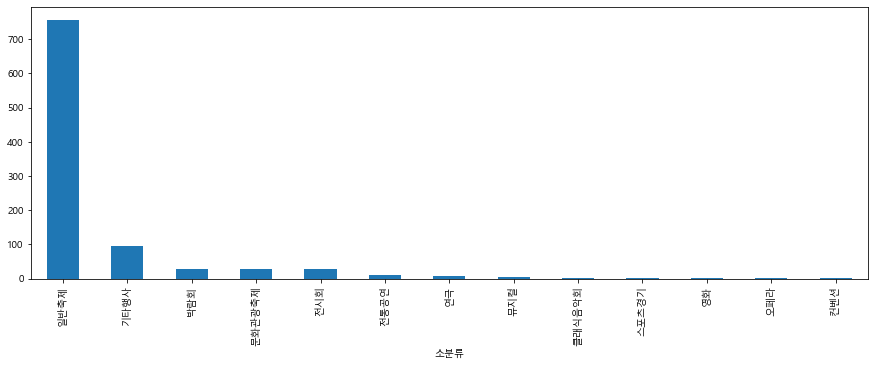

In [32]:
소분류별.plot(kind='bar',figsize=(15,5))